In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
train = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')
# sample_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [3]:
X = train.drop(columns=['Made_Purchase'], axis=1)
y = train['Made_Purchase']

X.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,4.0,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,3.0,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,2.0,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0


In [4]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Made_Purchase, dtype: bool

In [5]:
X.shape

(14731, 21)

# **EDA on dataset**

In [6]:
X.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [7]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
print(num_features)
print(cat_features)

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'WeekendPurchase'],
      dtype='object')
Index(['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status'],
      dtype='object')


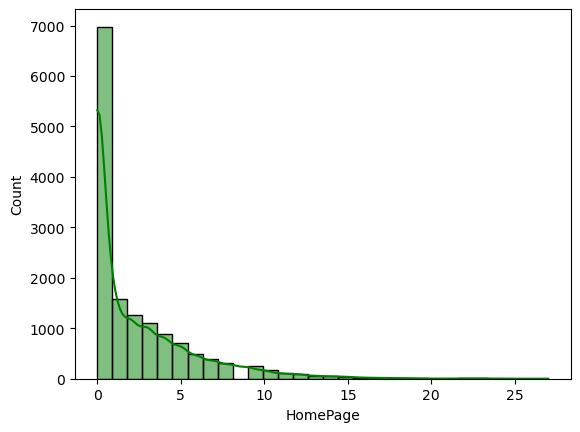

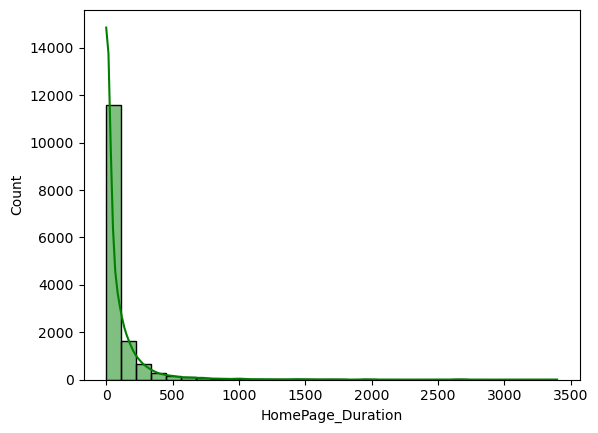

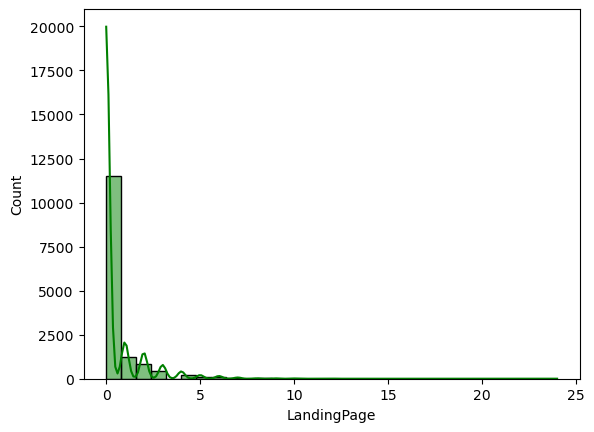

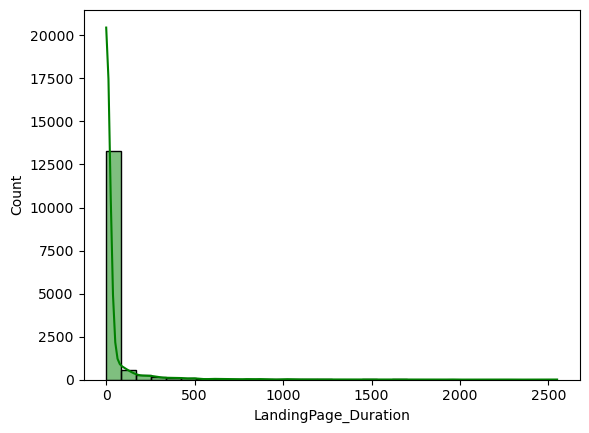

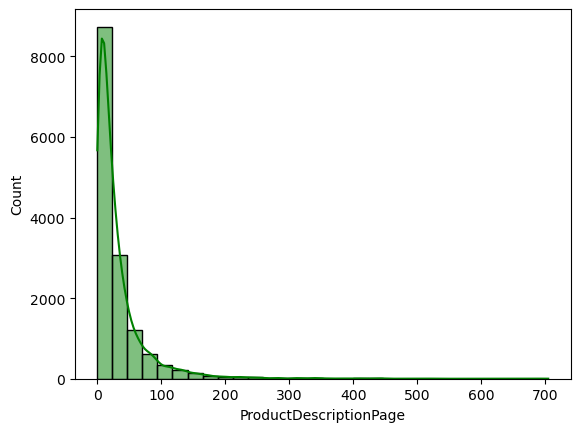

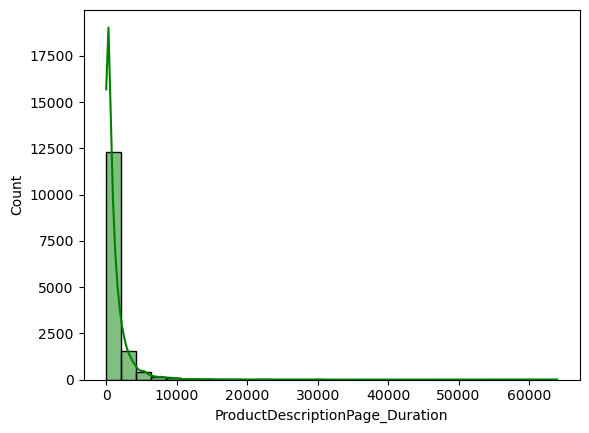

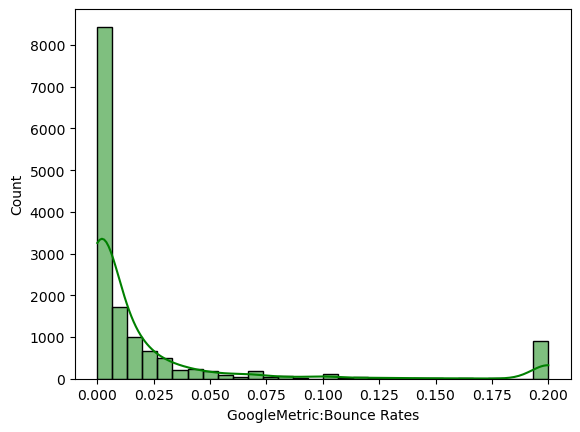

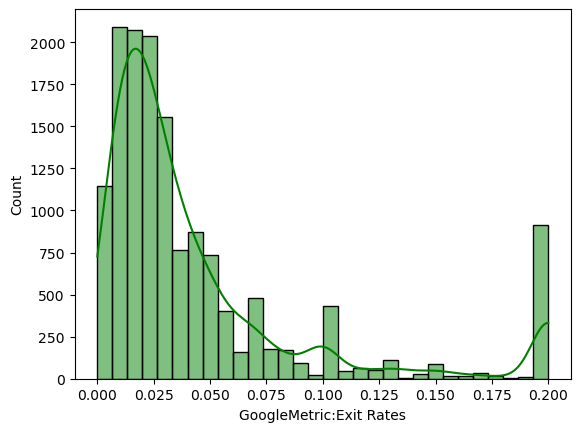

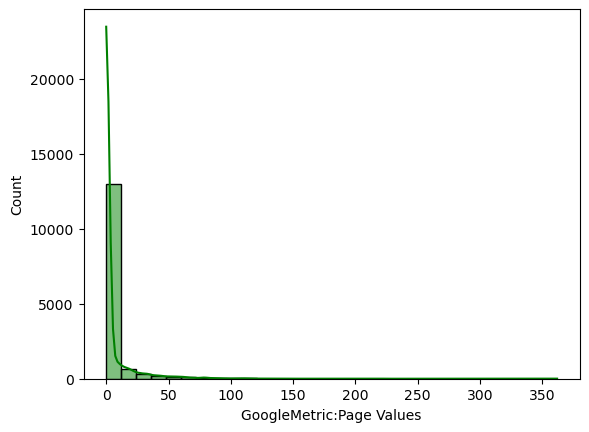

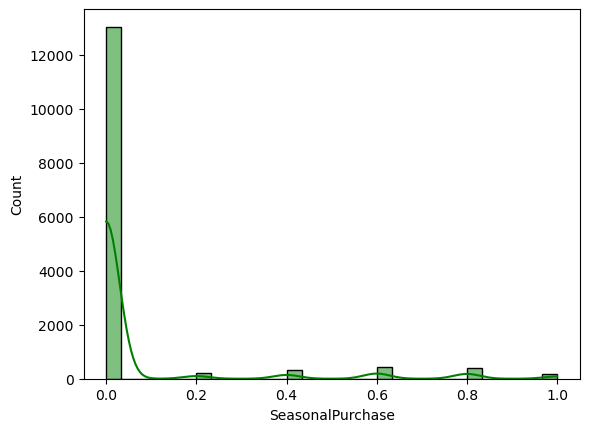

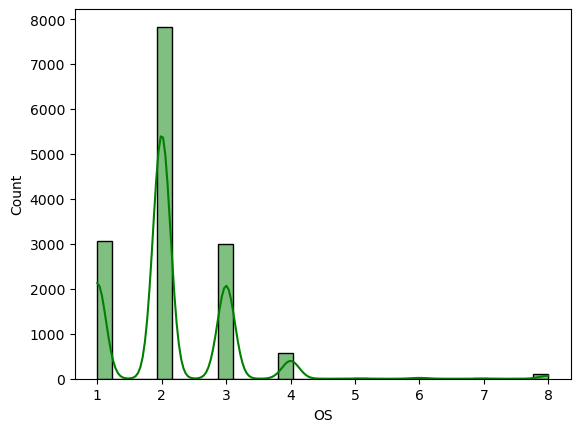

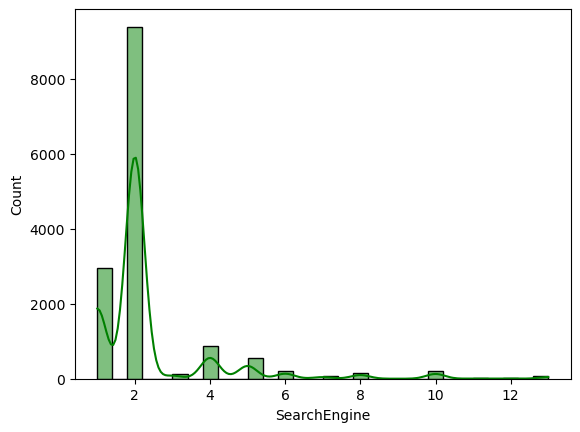

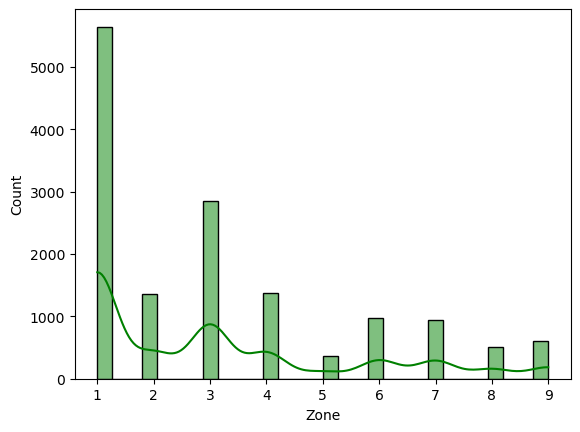

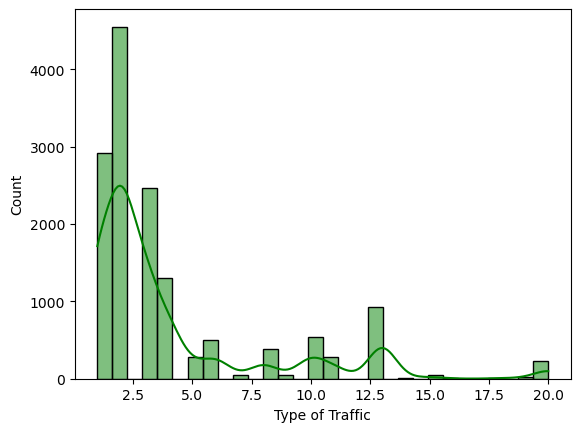

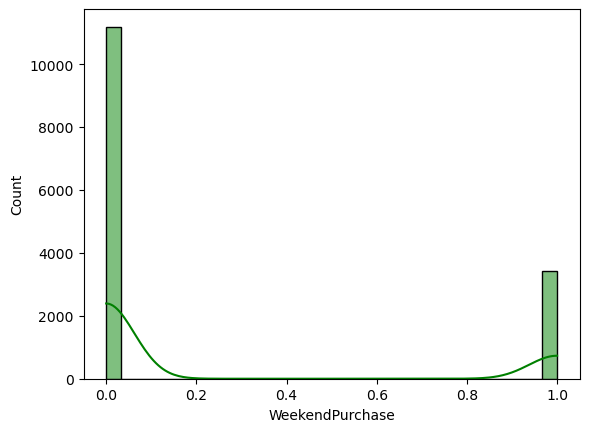

In [8]:

for i in num_features:
    sns.histplot(data=X, x=i ,bins=30,kde=True,color='g')
    plt.show()

<AxesSubplot:>

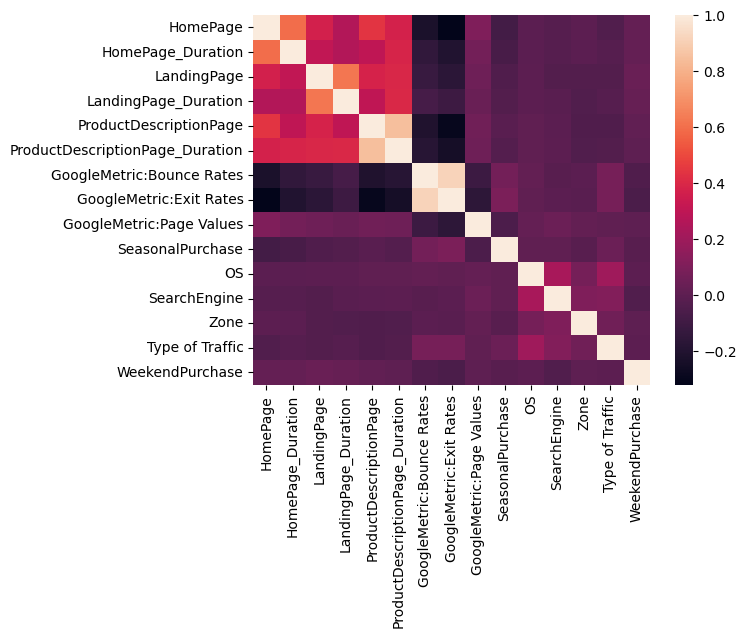

In [9]:
sns.heatmap(X.corr())

# **Data cleaning & pre-processing**

In [4]:
X = X.drop(columns = ['GoogleMetric:Exit Rates', 'ProductDescriptionPage', 'LandingPage', 'HomePage', 'LandingPage_Duration'], axis=1)

<AxesSubplot:>

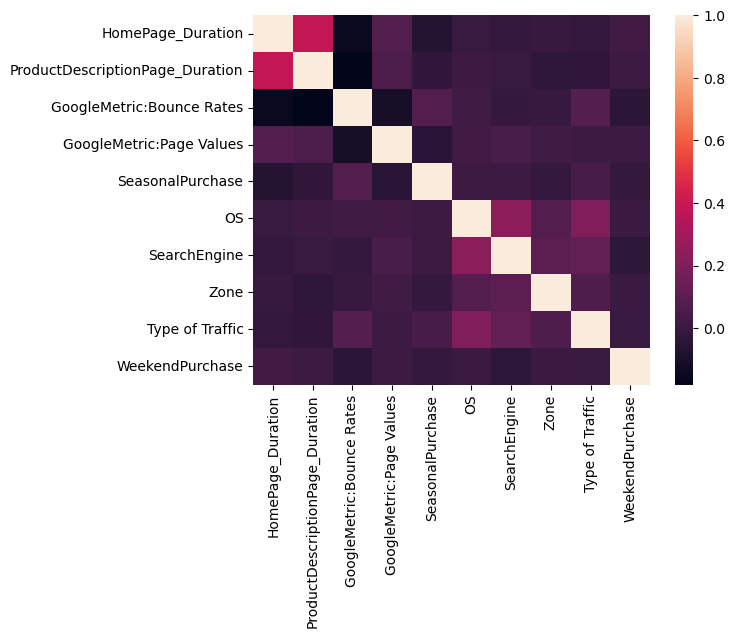

In [5]:
sns.heatmap(X.corr())

In [6]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
print(num_features)
print(cat_features)

Index(['HomePage_Duration', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Page Values',
       'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic',
       'WeekendPurchase'],
      dtype='object')
Index(['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status'],
      dtype='object')


In [7]:

# for i in X.columns:
#     print("Null values for feature", i, end=" ")
#     print(X[i].isnull().sum())
X.isna().sum()

HomePage_Duration                  150
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
dtype: int64

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline


preprocessing = ColumnTransformer([
    ('ohc', OneHotEncoder(drop='first'),cat_features),
    ('knnimpute', KNNImputer(weights='distance'), num_features),
    ('ss', StandardScaler(), num_features),
#     ('knn', KNNImputer(weights='distance'),num_features )
    ])
preprocessing_impute = Pipeline([('preprocessing', preprocessing),
                                ('knnimpute', KNNImputer(n_neighbors=5, weights='distance'))
                                ])

_X = preprocessing_impute.fit_transform(X)

_X.shape

(14731, 46)

In [11]:
_X = pd.DataFrame(_X)
_X .isnull().sum().sum()

0

In [12]:
_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14731 non-null  float64
 1   1       14731 non-null  float64
 2   2       14731 non-null  float64
 3   3       14731 non-null  float64
 4   4       14731 non-null  float64
 5   5       14731 non-null  float64
 6   6       14731 non-null  float64
 7   7       14731 non-null  float64
 8   8       14731 non-null  float64
 9   9       14731 non-null  float64
 10  10      14731 non-null  float64
 11  11      14731 non-null  float64
 12  12      14731 non-null  float64
 13  13      14731 non-null  float64
 14  14      14731 non-null  float64
 15  15      14731 non-null  float64
 16  16      14731 non-null  float64
 17  17      14731 non-null  float64
 18  18      14731 non-null  float64
 19  19      14731 non-null  float64
 20  20      14731 non-null  float64
 21  21      14731 non-null  float64
 22

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(_X,y,test_size = 0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13257, 46), (1474, 46), (13257,), (1474,))

# **EDA once again**

In [24]:

# for i in range(0, len(_X.columns)):
#     sns.histplot(data=_X, x=i ,bins=30,kde=True,color='g')
#     plt.show()

# **MODEL BUILDING**

In [14]:
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report

models = {
    'Logistic Regression': LogisticRegressionCV(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Linear Support Vector Machine': LinearSVC(),
    'SGD Classifier': SGDClassifier()
}

def model_evaluation(true, pred):
    return classification_report(y_test, y_pred,digits=4)

In [15]:
for i in models.keys():
    model = models[i]
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(i)
    print(model_evaluation(y_test, y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression
              precision    recall  f1-score   support

       False     0.6739    0.9556    0.7904       947
        True     0.6794    0.1689    0.2705       527

    accuracy                         0.6744      1474
   macro avg     0.6766    0.5623    0.5305      1474
weighted avg     0.6758    0.6744    0.6045      1474

Decision Tree
              precision    recall  f1-score   support

       False     0.6113    0.6177    0.6145       947
        True     0.2998    0.2941    0.2969       527

    accuracy                         0.5020      1474
   macro avg     0.4555    0.4559    0.4557      1474
weighted avg     0.4999    0.5020    0.5010      1474

Random Forest
              precision    recall  f1-score   support

       False     0.6236    0.6579    0.6403       947
        True     0.3179    0.2865    0.3014       527

    accuracy                         0.5251      1474
   macro avg     0.4708    0.4722    0.4708      1474
weighted avg     0.5143   

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [30]:
model = LogisticRegressionCV()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

       False     0.6777    0.9546    0.7926       947
        True     0.6929    0.1841    0.2909       527

    accuracy                         0.6791      1474
   macro avg     0.6853    0.5693    0.5417      1474
weighted avg     0.6831    0.6791    0.6132      1474



In [18]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='perceptron', warm_start=True, n_iter_no_change=7, max_iter=3000, alpha=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

       False     0.6655    0.9683    0.7888       947
        True     0.6875    0.1252    0.2119       527

    accuracy                         0.6669      1474
   macro avg     0.6765    0.5468    0.5003      1474
weighted avg     0.6733    0.6669    0.5825      1474



# **MODEL TESTING**

In [31]:
test_data = test.drop(columns = ['GoogleMetric:Exit Rates', 'ProductDescriptionPage', 'LandingPage', 'HomePage'], axis=1)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage_Duration                6544 non-null   float64
 1   LandingPage_Duration             6524 non-null   float64
 2   ProductDescriptionPage_Duration  6536 non-null   float64
 3   GoogleMetric:Bounce Rates        6533 non-null   float64
 4   GoogleMetric:Page Values         6554 non-null   float64
 5   SeasonalPurchase                 6554 non-null   float64
 6   Month_SeasonalPurchase           6541 non-null   object 
 7   OS                               6537 non-null   float64
 8   SearchEngine                     6541 non-null   float64
 9   Zone                             6552 non-null   float64
 10  Type of Traffic                  6531 non-null   float64
 11  CustomerType                     6511 non-null   object 
 12  Gender              

In [33]:
test_data= preprocessing_impute.transform(test_data)
test_data=pd.DataFrame(test_data)
print("Null Values", test_data.isnull().sum().sum())

KeyError: "None of [Index(['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',\n       'Education', 'Marital Status'],\n      dtype='object')] are in the [columns]"

In [34]:
prediction = model.predict(test_data)

In [35]:
submission = pd.DataFrame(columns = ['id','Made_Purchase'])
submission['id'] = [i for i in range(len(prediction))]
submission['Made_Purchase'] = prediction
submission.to_csv('submission.csv',index = False)

In [36]:
submission

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
6594,6594,False
6595,6595,False
6596,6596,False
6597,6597,False
